# Data Exploration

In [85]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import math

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Spreadsheet tabs:
- readme
- **clean_hh_data**: Clean dataset from MSNA data collection in all locations assessed, post-data cleaning
- **ind_hh_member_data**: Clean dataset from MSNA data collection relating to loop on individual household members in all locations assessed, post-data cleaning
- **ind_waterloop_data**: Clean dataset from MSNA data collection relating to loop on water information in all locations assessed, post-data cleaning
- survey
- choices

In [3]:
pd.read_excel("reach_nga_msna_clean_dataset_final.xlsx", sheet_name="readme", header=1)

Item  \
0                                  Project Background   
1                                  Target populations   
2                                        Methodology    
3   Data collection time period and geographic cov...   
4                              Weighting for analysis   
5              Multi-Sector Needs Assessment weblink    
6                                              Credit   
7                                             Contact   
8                                                 NaN   
9                                              Sheets   
10                                      Clean HH Data   
11                          Individual HH member Data   
12                         Individual Water loop Data   
13                                             Survey   
14                                            Choices   

                                          Description  
0   Despite the increase in number of humanitarian...  
1     IDPs, Returnees, Non-Displaced/Host Communities  
2   This MSNA covered all accessible locations in ...  
3   Data collection took place in one round, begin...  
4   Results of the Nigeria MSNA are representative...  
5   http://www.reachresourcecentre.info/countries/...  
6   The Multi-Sector Needs Assessment was carried ...  
7   Eric Kramak (eric.kramak@reach-initiative.org)...  
8                                                 NaN  
9                                         Description  
10  Clean dataset from MSNA data collection in all...  
11  Clean dataset from MSNA data collection relati...  
12  Clean dataset from MSNA data collection relati...  
13      KoBo form used for the mobile data collection  
14  KoBo form choices used for the mobile data col...

## Clean HH Data

In [4]:
data = pd.read_excel("reach_nga_msna_clean_dataset_final.xlsx", sheet_name="clean_hh_data")
# Pick only rows with Consent = Yes (this needs to be taken into account when analyzing data)
data.drop(data.Consent[data.Consent != "Yes, agrees to interview"].index, inplace=True)
# Remove columns
cols_to_remove = [ "Consent", "start", "end" ]
data.drop(cols_to_remove, axis=1, inplace=True)
data

State        LGA           Ward                   Village  \
1      Borno  askirauba  hausarizadawa               Zadawa camp   
2      Borno  askirauba  hausarizadawa               Zadawa camp   
3      Borno  askirauba  hausarizadawa               Zadawa camp   
4      Borno  askirauba  hausarizadawa                    Zadawa   
5      Borno  askirauba  hausarizadawa                     Kizar   
6      Borno  askirauba    rumirguchul                Lagunasara   
7      Borno  askirauba    rumirguchul  Lagunasara a bulama abdu   
8      Borno  askirauba    rumirguchul                Lagunasara   
9      Borno  askirauba     askiraeast                    Wuyahu   
10     Borno  askirauba    rumirguchul       Chul anguwan hakimi   
12     Borno  askirauba  hausarizadawa            Hausari Zadawa   
13     Borno  askirauba  hausarizadawa                   Hausari   
15     Borno  askirauba    rumirguchul       Chul anguwan hakimi   
17     Borno  askirauba    rumirguchul       Chul anguwan hakimi   
18     Borno  askirauba  hausarizadawa                     Kizar   
19     Borno  askirauba         uvuuda                       Uda   
20     Borno  askirauba         uvuuda                       Uda   
21     Borno  askirauba    rumirguchul                Lagunasara   
23     Borno  askirauba     askiraeast                    Wuyahu   
24     Borno  askirauba         uvuuda                       Uda   
25     Borno  askirauba     askiraeast                    Wuyahu   
26     Borno  askirauba  hausarizadawa                   Paidana   
28     Borno  askirauba  hausarizadawa                    Zadawa   
29     Borno  askirauba  hausarizadawa                  Payadana   
30     Borno  askirauba  hausarizadawa                   Paidana   
31     Borno  askirauba  hausarizadawa                  Kai dana   
32     Borno  askirauba  hausarizadawa                     Kizar   
33     Borno  askirauba  hausarizadawa                    Pedana   
34     Borno  askirauba  hausarizadawa                     Kizar   
37     Borno  askirauba         uvuuda                       Uda   
...      ...        ...            ...                       ...   
10576   Yobe   yusufari       yusufari             Mallam Lawatu   
10577   Yobe   yusufari           guya                Kasharam B   
10578   Yobe   yusufari       bulatura          ingikimewa kondo   
10579   Yobe   yusufari       bulatura          Fulatari m manga   
10580   Yobe   yusufari       bulatura                  Ngerrewa   
10581   Yobe   yusufari       bulatura               Ingikimaiwa   
10582   Yobe   yusufari       bulatura                 Ngerwrewa   
10583   Yobe   yusufari           guya                  Kashiram   
10584   Yobe   yusufari     kumagannam                    Masara   
10585   Yobe   yusufari      maimalari                 Maimalari   
10586   Yobe   yusufari     kumagannam            Lamido Kanture   
10587   Yobe   yusufari       yusufari                   Kamfala   
10588   Yobe   yusufari         sumbar                Grema maza   
10589   Yobe   yusufari       yusufari             Jigawa m sule   
10590   Yobe   yusufari     kumagannam                   Kaumadi   
10591   Yobe   yusufari     kumagannam             Mainiya yamma   
10592   Yobe   yusufari         mayori                  Garomari   
10593   Yobe   yusufari         mayori       Kerewa maigari damo   
10594   Yobe   yusufari     kumagannam                    Kayaka   
10595   Yobe   yusufari     kumagannam                    Kayaka   
10596   Yobe   yusufari           guya            Kasharam bukar   
10597   Yobe   yusufari           guya            Alhaji lamanti   
10598   Yobe   yusufari         sumbar                Grema maza   
10599   Yobe   yusufari         mayori              Mungono Kura   
10600   Yobe   yusufari       bulatura      Fulatari Malam Manga   
10601   Yobe   yusufari     kumagannam              Kayaka Arewa   
10602   Yobe   yusufari         jebuwa             Unguwan amar

In [5]:
def to_cats_with_rename(data, cat_names, cols):
    #for c in cols:
    #    data[c] = data[c].astype("category").cat.rename_categories(cat_names)
    #HERE to check    
    for c in data.select_dtypes(['object']).columns:
        data[c] = data[c].str.strip() 

cols_lang = data.columns[data.columns.str.match('Language')]
cols_special = [ "_id", "_uuid", "_parent_index" ]

cols_weights = [ "matching_weights", "WEIGHT_IND_LGA", "WEIGHT_HH_DOMAIN", "WEIGHT_HH_STATE", "HH_ALL" ]

# Change column types
cols_categorical = [ 
    "State", "LGA", "Ward", "Village", "CLUSTER NAME", "cluster_id", "Domain", 
    "Population Group", "Population Group - Status Check", "Respondent Sex", 
    "Head of Household Sex", "Head of Household Marital Status", 
    "How does your current level of income compare to the previous 3 months?",
    "How far is the closest health facility to you?",
    "Has anyone in your household experienced movement restrictions in your area in t",
]

for c in cols_categorical:
    data[c] = data[c].astype("category")


cat_yndk = {
    1: "Yes",
    2: "No",
    98: "No reponse",
    99: "Don't know"
}
cols_yndk = [ 
    "Head of Household - Y/N", "Did you have enough water in the last 30 days to meet your household needs ?", 
    "Is the shelter damaged?", "Are you at risk of being evicted or forced to leave this shelter within the next", 
    "Have you had physical access to a market in the last two weeks?",
    "Is your household in debt (of money?)",
    "Has anyone in your household been sick in the past two weeks?",
    "Has anyone in your household experienced any security incidents in the last thre.1",
    "Is there any member of your household who is missing or being detained?",
]
to_cats_with_rename(data, cat_yndk, cols_yndk)
    
cat_yns = {
    1: "Yes, always",
    2: "Yes, sometimes",
    3: "No",
    98: "No response",
    99: "Don't know"
}
cols_yns = [ \
    "Do you have to pay to access water from your main source?",
]
to_cats_with_rename(data, cat_yns, cols_yns)

#### Interactive plot with value counts for each categorical column

In [264]:
def plot_value_bars(data):
    return lambda column: data[column].value_counts().plot('barh')

_ = interact(plot_value_bars(data), column=data.select_dtypes(include='category').columns)

interactive(children=(Dropdown(description='column', options=('State', 'LGA', 'Ward', 'Village', 'CLUSTER NAME…

#### List of Columns & Values

In [7]:
data_counts = data.nunique()
descr       = data.columns.map(lambda x: "; ".join(map(str, data[x].unique())) if data[x].nunique() < 10 else "")
list(zip(data_counts.index, data_counts, descr))

[('State', 3, 'Borno; Yobe; Adamawa'),
 ('LGA', 63, ''),
 ('Ward', 400, ''),
 ('Village', 3547, ''),
 ('CLUSTER NAME', 1264, ''),
 ('cluster_id', 1478, ''),
 ('Domain', 10, ''),
 ('Population Group',
  3,
  'Internally Displaced Persons (IDPs); Non-displaced; Returnees'),
 ('Population Group - Status Check',
  3,
  'Household displaced since January 2009 and currently is not living in their village/area of origin; Household has never been displaced from their village/area of origin since January 2009; Household displaced since January 2009 but has since returned and currently is in their village/area of origin'),
 ('Head of Household - Y/N', 4, "Yes; No; Don't know; No reponse"),
 ('Able to Answer Household Needs?', 4, 'nan; 98.0; 1.0; 2.0; 99.0'),
 ('Respondent Age', 78, ''),
 ('Respondent Sex', 2, 'Male; Female'),
 ('Head of Household Sex', 2, 'Male; Female'),
 ('Head of Household Age', 81, ''),
 ('Head of Household Marital Status',
  5,
  'Married, only 1 partner; Married, more than

Matching Ward and Clusters between Clean_Dataset and Initial_Sample:

- different spelling: easy to correct (missing letters, special characters)
- different names: difficult to correct (>100)

This makes automatic matching of the geo coordinates not very straightforward.

In [80]:
# Initial sample
# information about the Ward together with the GPS coordinates
sample = pd.read_excel("reach_nga_msna_initial_sample.xlsx", header=1)
print(sample.shape)
sample.head()

(1522, 12)
     State       LGA     ward   Ward_alt1_ Sample Settlement_Camp  Survey  \
0  Adamawa     Demsa  Borrong      Borrong             BORRONG A       11   
1  Adamawa     Demsa     Dong         Dong                  DONG       11   
2  Adamawa     Girei  Girei 1      Girei I             SABON GARI       5   
3  Adamawa     Girei  Girei 2     Girei II             MAI TURARE       5   
4  Adamawa     Girei  Girei 2     Girei II             SABON FEGI       5   
5  Adamawa      Hong      Uba          Uba                MANPAYA       5   
6  Adamawa  Madagali     Duhu  Duhu/ Shuwa                   DUHU       5   
7  Adamawa  Madagali     Duhu  Duhu/ Shuwa                  SHUWA      20   
8  Adamawa  Madagali    Gulak        Gulak          MARKET SQUARE      15   
9  Adamawa  Madagali    Gulak        Gulak                MISSION      10   

  TYPE        Settleme_1            DOMAIN     HH       lon       lat  
0  IDP   host community   Southern Adamawa  138.0  12.18101   9.53608

In [9]:
def extract_cats(series):
    # Correct typos
    replacements = {
        'alaramma': 'alarama',
        'alhbaffastreet': 'alhajibaffastreet',
    }
    # Remove special characters to match different spreadsheet naming conventions
    rmchars = series.str.lower().str \
                .replace(r"[ \t \- /.&_']*", "", regex=True) \
                .replace(r"(ha[0-9]+)rc", r"\1", regex=True)
    cats = rmchars.replace(replacements).astype("category").cat.categories
    cats.sort_values()
    return cats

In [263]:
datacats   = extract_cats(data['CLUSTER NAME'])
samplecats = extract_cats(sample['Sample Settlement_Camp'])
#datacats   = extract_cats(data['Ward'])
#samplecats = extract_cats(sample['ward'])
# Cluster names which cannot be found in Sample Settlement_Camp column:

print(datacats[0:10])
print(samplecats.shape)

diffcats = list(set(datacats) - set(samplecats))
diffcats.sort()
diffcats

Index(['1000campdikwa', '20housingunit', '3bedroomextension',
       '400housingesategubio', '55unit', '777twobedroomsitec', '80unit',
       'abachari', 'abatchanguro', 'abatchaumar'],
      dtype='object')
(1240,)


['abujabulabilinrc',
 'alagarno',
 'alhajidarmanrc',
 'alhajimodukoleri',
 'alhgonifikarc',
 'alimasterrc',
 'anguwansarkilabbare',
 'anguwarfulani',
 'anguwarlala',
 'ardoyusufrc',
 'bajiye2',
 'bangashanga',
 'barderc',
 'bayarc',
 'bella',
 'bilahikamarc',
 'birisouthrc',
 'bulamabangalu',
 'bulamafugu',
 'bulamakadaibahausaunitrc',
 'bunduri',
 'chakamodari',
 'chana',
 'dalehirc',
 'dalwahsusawarc',
 'dilli',
 'dungerc',
 'duwurirc',
 'dwamtappare',
 'europeanquartersrc',
 'fezzan',
 'filinkurma',
 'fulataricamprc',
 'fulatarikoriyel',
 'fulatarirc',
 'furtub',
 'gabasa',
 'gahlainde',
 'galdimari',
 'gujbafulataribrc',
 'gulungonepa',
 'ha161',
 'ha36',
 'ha74',
 'ha77',
 'ha99',
 'hakpalame',
 'hayingadatcquarters',
 'hurkubutarc',
 'hussainirirc',
 'jajelbilanallerc',
 'jakanabidamirc',
 'jakanabulamamusamirc',
 'jauroaminakinrc',
 'jauroobadiah',
 'jigalamburc',
 'kaguram',
 'kairi',
 'kanuri',
 'kashinyaworc',
 'kganguwan(garu)',
 'kuffagarirc',
 'kwalinga',
 'kwatpeorc',
 'l

##  Individual HH Member Data

In [11]:
# Clean data "_uuid" = hh member "UNIQUE RECORD/HOUSEHOLD IDENTIFIER"
datahh     = pd.read_excel("reach_nga_msna_clean_dataset_final.xlsx", sheet_name="ind_hh_member_data")
hhwithkids = datahh[datahh["AGE - years"].between(6, 18)]
datahh

survey_date  State          domain        LGA           Ward  \
0       20180727.0  Borno  southern borno  askirauba  hausarizadawa   
1       20180727.0  Borno  southern borno  askirauba  hausarizadawa   
2       20180727.0  Borno  southern borno  askirauba  hausarizadawa   
3       20180727.0  Borno  southern borno  askirauba  hausarizadawa   
4       20180727.0  Borno  southern borno  askirauba  hausarizadawa   
5       20180727.0  Borno  southern borno  askirauba  hausarizadawa   
6       20180727.0  Borno  southern borno  askirauba  hausarizadawa   
7       20180727.0  Borno  southern borno  askirauba  hausarizadawa   
8       20180727.0  Borno  southern borno  askirauba  hausarizadawa   
9       20180727.0  Borno  southern borno  askirauba  hausarizadawa   
10      20180727.0  Borno  southern borno  askirauba  hausarizadawa   
11      20180727.0  Borno  southern borno  askirauba  hausarizadawa   
12      20180727.0  Borno  southern borno  askirauba    rumirguchul   
13      20180727.0  Borno  southern borno  askirauba    rumirguchul   
14      20180727.0  Borno  southern borno  askirauba  hausarizadawa   
15      20180727.0  Borno  southern borno  askirauba  hausarizadawa   
16      20180727.0  Borno  southern borno  askirauba  hausarizadawa   
17      20180727.0  Borno  southern borno  askirauba  hausarizadawa   
18      20180727.0  Borno  southern borno  askirauba  hausarizadawa   
19      20180727.0  Borno  southern borno  askirauba  hausarizadawa   
20      20180727.0  Borno  southern borno  askirauba         uvuuda   
21      20180727.0  Borno  southern borno  askirauba    rumirguchul   
22      20180727.0  Borno  southern borno  askirauba  hausarizadawa   
23      20180727.0  Borno  southern borno  askirauba  hausarizadawa   
24      20180727.0  Borno  southern borno  askirauba    rumirguchul   
25      20180727.0  Borno  southern borno  askirauba         uvuuda   
26      20180727.0  Borno  southern borno  askirauba         uvuuda   
27      20180727.0  Borno  southern borno  askirauba    rumirguchul   
28      20180727.0  Borno  southern borno  askirauba  hausarizadawa   
29      20180727.0  Borno  southern borno  askirauba  hausarizadawa   
...            ...    ...             ...        ...            ...   
63891          NaN    NaN             NaN        NaN            NaN   
63892          NaN    NaN             NaN        NaN            NaN   
63893          NaN    NaN             NaN        NaN            NaN   
63894          NaN    NaN             NaN        NaN            NaN   
63895          NaN    NaN             NaN        NaN            NaN   
63896          NaN    NaN             NaN        NaN            NaN   
63897          NaN    NaN             NaN        NaN            NaN   
63898          NaN    NaN             NaN        NaN            NaN   
63899          NaN    NaN             NaN        NaN            NaN   
63900          NaN    NaN             NaN        NaN            NaN   
63901          NaN    NaN             NaN        NaN            NaN   
63902          NaN    NaN             NaN        NaN            NaN   
63903          NaN    NaN             NaN        NaN            NaN   
63904          NaN    NaN             NaN        NaN            NaN   
63905          NaN    NaN             NaN        NaN            NaN   
63906          NaN    NaN             NaN        NaN            NaN   
63907          NaN    NaN             NaN        NaN            NaN   
63908          NaN    NaN             NaN        NaN            NaN   
63909          NaN    NaN             NaN        NaN            NaN   
63910          NaN    NaN             NaN        NaN            NaN   
63911          NaN    NaN             NaN        NaN            NaN   
63912          NaN    NaN             NaN        NaN            NaN   
63913          NaN    NaN             NaN        NaN            NaN   
63914          NaN    NaN             NaN        NaN            NaN   
63915          NaN    NaN      

##  Individual Water Loop Data

In [12]:
pd.read_excel("reach_nga_msna_clean_dataset_final.xlsx", sheet_name="ind_waterloop_data")

state          domain        lga           ward                cluster  \
0      Borno  southern borno  askirauba  hausarizadawa             zadawacamp   
1      Borno  southern borno  askirauba  hausarizadawa             zadawacamp   
2      Borno  southern borno  askirauba  hausarizadawa             zadawacamp   
3      Borno  southern borno  askirauba  hausarizadawa             zadawacamp   
4      Borno  southern borno  askirauba  hausarizadawa             zadawacamp   
5      Borno  southern borno  askirauba  hausarizadawa             zadawacamp   
6      Borno  southern borno  askirauba  hausarizadawa             zadawacamp   
7      Borno  southern borno  askirauba  hausarizadawa             zadawacamp   
8      Borno  southern borno  askirauba  hausarizadawa             zadawacamp   
9      Borno  southern borno  askirauba  hausarizadawa             zadawacamp   
10     Borno  southern borno  askirauba  hausarizadawa             zadawacamp   
11     Borno  southern borno  askirauba  hausarizadawa             zadawacamp   
12     Borno  southern borno  askirauba  hausarizadawa             zadawacamp   
13     Borno  southern borno  askirauba    rumirguchul  lagunasaraabulamaabdu   
14     Borno  southern borno  askirauba  hausarizadawa                 kirzar   
15     Borno  southern borno  askirauba    rumirguchul  lagunasaraabulamaabdu   
16     Borno  southern borno  askirauba  hausarizadawa                 kirzar   
17     Borno  southern borno  askirauba    rumirguchul      chulanguwanhakimi   
18     Borno  southern borno  askirauba         uvuuda                  lagos   
19     Borno  southern borno  askirauba  hausarizadawa            ardoyusufrc   
20     Borno  southern borno  askirauba  hausarizadawa                 kirzar   
21     Borno  southern borno  askirauba  hausarizadawa            ardoyusufrc   
22     Borno  southern borno  askirauba         uvuuda                  lagos   
23     Borno  southern borno  askirauba  hausarizadawa                 kirzar   
24     Borno  southern borno  askirauba     askiraeast                 wuyahu   
25     Borno  southern borno  askirauba  hausarizadawa      hausarilawanhamza   
26     Borno  southern borno  askirauba  hausarizadawa                 kirzar   
27     Borno  southern borno  askirauba     askiraeast                 wuyahu   
28     Borno  southern borno  askirauba     askiraeast                 wuyahu   
29     Borno  southern borno  askirauba  hausarizadawa                 kirzar   
...      ...             ...        ...            ...                    ...   
26792    NaN             NaN        NaN            NaN                    NaN   
26793    NaN             NaN        NaN            NaN                    NaN   
26794    NaN             NaN        NaN            NaN                    NaN   
26795    NaN             NaN        NaN            NaN                    NaN   
26796    NaN             NaN        NaN            NaN                    NaN   
26797    NaN             NaN        NaN            NaN                    NaN   
26798    NaN             NaN        NaN            NaN                    NaN   
26799    NaN             NaN        NaN            NaN                    NaN   
26800    NaN             NaN        NaN            NaN                    NaN   
26801    NaN             NaN        NaN            NaN                    NaN   
26802    NaN             NaN        NaN            NaN                    NaN   
26803    NaN             NaN        NaN            NaN                    NaN   
26804    NaN             NaN        NaN            NaN                    NaN   
26805    NaN             NaN        NaN            NaN                    NaN   
26806    NaN             NaN        NaN            NaN                    NaN   
26807    NaN             NaN        NaN            NaN                    NaN   
26808    NaN             NaN        NaN            NaN                    NaN   
26809    NaN             NaN        Na

## Computing Scores

Based on the following documents:

- Annex_Indicator_PiN.docx
- Annex_Indicator_PiN.pdf
- reach_nga_report_2018_multi_sector_needs_assessment_march_2019_0.pdf, Annex 6: Indicators and Thresholds for Sectoral Index Indicators ([link](http://bit.ly/2C5O7Cs)).

Note that at the moment "Don't know" and "No response" answers are excluded.
Aggregation (say, average over ward or state) needs to take this into account.

There're questions where people can specify what kind of help they would like to receive. Could be something to look into.

In [13]:
# WASH
def wash_no_water_access(data):
    w = 2.0
    # TODO: check problems with fetching the water, water quality and cost
    series = data[["WATER SOURCE - Borehole / tubewell", \
                   "WATER SOURCE - Public tap / standpipe", \
                   "WATER SOURCE - Piped into dwelling or plot", \
                   "WATER SOURCE - Handpump", \
                   "WATER SOURCE - Protected well", \
                   "WATER SOURCE - Protected spring" ]] \
            .eq("No").all(1, skipna=True).astype("float") * w
    series.name = "WASH_No_Water_Access"
    return series

def wash_below_15lpd(data):
    w = 3.0
    # TODO: maybe check also "TOTAL QUANTITY WATER COLLECTED PREVIOUS DAY"
    series = (data["HOUSEHOLD WATER CONSUMPTOPN (liters per person per day)"] < 15).astype("float") * w
    series.name = "WASH_Below_15lpd"
    return series

def wash_no_latrine_access(data):
    w = 2.0
    # Note that the response for "Other" doesn't contain any special answers
    # TODO: check reasons not to use it
    series = (data["Do the members of your household have access to a functioning latrine?"] \
              .isin(["No, defecate in the bush", "No, defecate in area designated by the community"])) * w
    
    #series = (~data["Do the members of your household have access to a functioning latrine?"] \
    #            .isin(["Yes, have latrine access"])) \
    #            .astype("float") * w
    series.name = "WASH_No_Latrine_Access"
    return series

def wash_above_30min(data):
    w = 2.0
    # TODO: check travel time etc
    series = data["How long does it take to collect water from your main water source, including tr"] \
                .isin(["From 30 minutes up to 1 hour", "From 1 hour up to 2 hours", "Greater than 2 hours" ]) \
                .astype("float") * w
    series.name = "WASH_Above_30min"
    return series

def wash_no_soap(data):
    w = 1.0
    series = (~data["Do you have soap in your household for handwashing?"] \
                .isin([ "Yes, they report having soap", "Yes, you see the soap" ])) \
                .astype("float") * w
    series.name = "WASH_No_Soap"
    return series

In [14]:
# SHELTER/NFI
def shelter_inadequate(data):
    w = 2.0
    # "Other" response column is empty
    series = data["What is the type of shelter?"] \
                .isin([ "Tent", \
                        "Makeshift (thatch house with collected materials)", \
                        "Collective shelter (mosque, school or other public building)", \
                        "No shelter / sleeps in the open space"]) \
                .astype("float") * w
    series.name = "SHELTER_Inadequate"
    return series

def shelter_damaged(data):
    w = 2.0
    # TODO: check type or cause of damage
    # data["Is the shelter damaged?"] == "Yes" includes option "No or very minimal damage"
    series = data["What is the severity of the damage to the shelter overall?"] \
                .isin([ "Partially damaged", "Completely destroyed (100%)" ]) \
                .astype("float") * w
    series.name = "SHELTER_Damaged"
    return series

def shelter_eviction_risk(data):
    w = 2.0
    series = (data["Are you at risk of being evicted or forced to leave this shelter within the next"] == "Yes") \
                .astype("float") * w
    series.name = "SHELTER_Eviction_Risk"
    return series

def shelter_no_basic_items(data):
    w = 2.0
    # Basic NFI Kit in the document has criteria "<7 of 13" but mentions only 12 items
    # The dataset has 22 columns, so we check <11 or None
    # TODO: School supplies are checked separately, should they be included?
    series = \
        data[["NFIS OWNED - Blankets", \
              "NFIS OWNED - Sleeping mat", \
              "NFIS OWNED - Mosquito net", \
              "NFIS OWNED - Jerry cans", \
              "NFIS OWNED - Laundry detercapture gent / bars", \
              "NFIS OWNED - Bath soap", \
              "NFIS OWNED - Reusable sanitary pad", \
              "NFIS OWNED - Solar lamp", \
              "NFIS OWNED - Foldable mattress", \
              "NFIS OWNED - Kettle", \
              "NFIS OWNED - 10L Basin", \
              "NFIS OWNED - Rope", \
              "NFIS OWNED - Cooking pots", \
              "NFIS OWNED - Stainless trays", \
              "NFIS OWNED - Stainless cups", \
              "NFIS OWNED - Serving spoons", \
              "NFIS OWNED - Kitchen knife", \
              "NFIS OWNED - 10L Bucket", \
              "NFIS OWNED - Aquatabs", \
              "NFIS OWNED - School bags", \
              "NFIS OWNED - School notebooks", \
              "NFIS OWNED - School textbooks"]] \
        .eq("Yes").astype("float").sum(axis=1) < 11
    series = (series | (data["NFIS OWNED - None"] == "Yes")).astype("float")
    series.name = "SHELTER_No_Basic_Items"
    return series

def shelter_many_families(data):
    w = 2.0
    # Note that there're 725 answers = 0 (?)
    series = (data["How many households, including yours, share your current accomodation? "] > 1).astype("float") * w
    series.name = "SHELTER_Many_Families"
    return series

In [15]:
# Food Consumption Score calculated using methodology from the 2018 report, see
# https://documents.wfp.org/stellent/groups/public/documents/manual_guide_proced/wfp197216.pdf?_ga=2.42910636.848875997.1543498323-2145050901.1543498323
def foodsec_cons_score(data):
    # Multiply the value obtained for each food group by its weight 
    # Sum the weighed food group scores, split into categories
    # Poor (0 - 21), Borderline (21.5 - 35), Acceptable (> 35)
    # FCS could potentially be used as a standalone feature
    w_poor       = 3.0
    w_borderline = 2.0
    
    series = 2.0 * data["FCS - Cereals"] + \
             3.0 * data["FCS - Pulses"] + \
             1.0 * data["FCS - Vegetables"] + \
             1.0 * data["FCS - Fruits"] + \
             4.0 * data["FCS - Meats"] + \
             4.0 * data["FCS - Dairy"] + \
             0.5 * data["FCS - Oils"] + \
             0.5 * data["FCS - Sweets"] + \
             0.0 * data["FCS - Spices"]

    criteria  = [series.lt(21.5), series.between(21.5, 35), series.gt(35)]
    values    = [w_poor, w_borderline, 0.0]
    series[:] = np.select(criteria, values, 0)

    series.name = "FOODSEC_FCS"
    return series


# Reduced Coping Strategy Index
def foodsec_rcsi(data):
    # TODO: check methodology
    series = 1.0 * data["RCSI - Less preferred foods"] + \
             2.0 * data["RCSI - Borrow food or food on credit"] + \
             1.0 * data["RCSI - Limit portion size at meals"] + \
             3.0 * data["RCSI - Restrict consumption by adults in order for small children to eat"] + \
             1.0 * data["RCSI - Reduce meals eaten in a day"]
    series = (series >= 10.0).astype("float") * 3.0
    series.name = "FOODSEC_RCSI"
    return series

def foodsec_safe(data):
    w = 2.0
    # TODO: what about option None in Q. about primary means?
    series = \
        0.33 * data["What is the most commonly used fuel type for COOKING in your household?"] \
                .isin(["Firewood", "Agricultural waste / crop residue", "Animal dung"]).astype("float") \
      + 0.33 * data["What is the most commonly used fuel type for LIGHTING in your household?"] \
                .isin(["Firewood", "None"]).astype("float") \
      + 0.33 * data["What is the most commonly used method of cooking in your household?"] \
                .isin(["Three-stone fire"]).astype("float") \
      + 0.33 * data["What is your primary means of obtaining firewood or whichever fuel source you pr"] \
                .isin(["Collect directly from outside the community", \
                       "From NGO aid  / assistance", \
                       "Trade goods or items for fuel"]).astype("float") \
      + 2.00 * data[["COPING FUEL - Selling food/rations to buy fuel",
                     "COPING FUEL - Begging for fuel"]].eq("Yes").any(axis=1).astype("float") \
      + 0.33 * data[["COPING FUEL - Use less preferred fuel source (animal dung, etc.)",
                     "COPING FUEL - Borrowing fuel/firewood",
                     "COPING FUEL - Collect firewood from the bush",
                     "COPING FUEL - Send children to collect firewood"]].eq("Yes").any(axis=1).astype("float")
    series = series * w
    series.name = "FOODSEC_SAFE"
    return series

def foodsec_market(data):
    w = 2.0
    # TODO: should limited income be included as well? what about other barriers (see below) 
    series = \
        1.0 * (data["Have you had physical access to a market in the last two weeks?"] == "No").astype("float") \
      + 1.0 * (data[["BARRIER FOOD - Market is too far away",
                     "BARRIER FOOD - Transportation to market is too expensive",
                     "BARRIER FOOD - Food prices are unusually high",
                     "BARRIER FOOD - Food not available in the market",
                     "BARRIER FOOD - Cannot access market due to PERCEIVED INSECURITY",
                     "BARRIER FOOD - Cannot access market due to MOVEMENT RESTRICTIONS by armed groups"]] \
                   .eq("Yes").any(axis=1).astype("float"))
    series = series * w
    series.name = "FOODSEC_Market"
    return series

def foodsec_agriculture(data):
    w = 2.0
    series = \
        0.50 * (data["Was your household able to plant and harvest crops during the last dry season?"] \
                .isin(["Didn't plant or harvest", "Planted but did not harvest anything"]).astype("float")) \
      + 0.50 * (data["Are you planning on planting and harvesting for this rainy season (2018)?"] \
                .isin(["No, will not plant or harvest this rainy season"]).astype("float")) \
      + 0.50 * (data["Were you able to access land?"] == "No, did not access any land") \
      + 0.25 * (data["Were you able to access land?"] == "Yes, but did not access amount of land needed") \
      + 0.50 * (data["Were you able to access water?"] == "No, did not access any water") \
      + 0.25 * (data["Were you able to access water?"] == "Yes, but did not access amount of water needed")
    series = series * w
    series.name = "FOODSEC_Agriculture"
    return series

In [16]:
data["BARRIER FOOD - Other - text"].value_counts()

Limited income                                             1
Due to the river we have no bridge                         1
Lack of chemicals                                          1
After farming yield not enough to feed the whole family    1
Lack of financial                                          1
No any incom                                               1
Not up to satisfaction                                     1
No enough money                                            1
One mudu  220                                              1
Farm chemicals                                             1
Enough food                                                1
No accessible  road                                        1
Name: BARRIER FOOD - Other - text, dtype: int64

In [17]:
# LIVELIHOODS
def live_incomedec(data):
    w = 2.0
    series = (data["How does your current level of income compare to the previous 3 months?"] == "Decrease") * w
    series.name = "LIVE_incomedec"
    return series

def live_debt(data):
    w = 2.0
    series = (data["Is your household in debt (of money?)"] == "Yes") * w
    series.name = "LIVE_debt"
    return series


# TODO: extend
# Stress strategies:    sell HH assets/goods, spend savings, sell (non-productive) animals, send HH members to eat elsewhere, purchase food on credit, or borrow money
# Crisis strategies:    sell productive assets, withdraw children from school, reduce expenses on basic services (education, health), harvest immature crops, consume seed stocks to be saved for next year, decrease expenditure on agricultural/animal-based activities and care
# Emergency strategies: sell house or land, beg for money, engage in illegal/dangerous income activities, sell last reproductive animals, or have the entire HH migrate/displace
def live_coping(data):
    # TODO: check C. L. Exhausted columns
    w = 3.0
    # ? COPING LIVELIHOOD - Sell household goods (furniture, jewelry, etc)
    series = data[["COPING LIVELIHOOD - Spend savings", 
                   "COPING LIVELIHOOD - Sell productive assets or means of transportation (sewing ma",
                   "COPING LIVELIHOOD - Sell land or property",
                   "COPING LIVELIHOOD - Engage in dangerous or illegal work/activity (theft, illegal",
                   "COPING LIVELIHOOD - Sell last female (productive) animals"]]\
            .eq("Yes").any(axis=1) * w
    series.name = "LIVE_Coping"
    return series

# Stress coping strategies such as: sell HH assets/goods, spend savings, sell (non-productive) animals, send HH members to eat elsewhere, purchase food on credit, or borrow money; Crisis coping strategies such as: sell productive assets, withdraw children from school, reduce expenses on basic services (education, health), harvest immature crops, consume seed stocks to be saved for next year, decrease expenditure on agricultural/animal-based activities and care; Emergency coping strategies such as: sell house or land, beg for money, engage in illegal/dangerous income activities, sell last reproductive animals, or have the entire HH migrate/displace

def live_cash(data):
    w = 3.0
    series = (data["How do you get cash?"] == "No access to cash") * w
    series.name = "LIVE_Cash"
    return series

In [18]:
# Merge with clean data
# Clean data "_uuid" = hh member "UNIQUE RECORD/HOUSEHOLD IDENTIFIER"
def edu_mergeclean(data, hhwithkids, series):
    return pd.concat([hhwithkids["UNIQUE RECORD/HOUSEHOLD IDENTIFIER"], series], axis=1)\
             .groupby("UNIQUE RECORD/HOUSEHOLD IDENTIFIER")\
             .any()\
             .reindex(data["_uuid"], fill_value=False)\
             .set_index(data.index)


def edu_notattending(data, hhwithkids):
    w = 3.0
    
    formal = \
        hhwithkids["What is the current FORMAL school attendance status of ?"]\
        .isin(["Did not attend any formal school this year",
               "Dropped out this year",
               "Never attended any formal school"])

    informal = \
        hhwithkids["What is the current INFORMAL school attendance status of ?"]\
        .isin(["Did not attend non-formal education this year",
               "Dropped out of non-formal education this year", 
               "Never attended any non-formal education"])
    series = (formal & informal)

    series.name = "EDU_NotAttending"
    return edu_mergeclean(data, hhwithkids, series) * w

def edu_neverattendedformal(data, hhwithkids):
    w = 3.0
    series = hhwithkids["What is the current FORMAL school attendance status of ?"] == "Never attended any formal school"
    series.name = "EDU_NeverAttendedFormal"
    return edu_mergeclean(data, hhwithkids, series) * w

def edu_barrier(data):
    w = 2.0
    # TODO: is it only access or any barrier?
    series = (data["BARRIER EDUCATION - No barriers"] == "No") * w
    series.name = "EDU_Barrier"
    return series

def edu_nosupplies(data):
    w = 2.0
    series = data[["NFIS OWNED - School bags", "NFIS OWNED - School notebooks", "NFIS OWNED - School textbooks"]] \
                 .eq("No").all(axis=1) * w
    series.name = "EDU_NoSupplies"
    return series

In [19]:
def health_barrier(data):
    w = 2.0
    series = (data["BARRIER HEALTH - No barrier"] == "No") * w
    series.name = "HEALTH_Barrier"
    return series

def health_childnovaccines(data, hhwithkids):
    # All answers are NaN for:
    # "Has  received any PENTA vaccine shots?",
    # "Has  received any polio (OPV) vaccine?"
    w = 2.0
    series = hhwithkids["Has  received any measles vaccine?"] == "No"
    series.name = "HEALTH_ChildNoVaccines"
    # TODO: 1. it's not correct to use the same criteria for selecting hhwithkids as in EDU case
    #       2. disagrees with clean summary, needs to be reviewed
    return edu_mergeclean(data, hhwithkids, series) * w

def health_illness2w(data):
    w = 2.0
    series = (data["Has anyone in your household been sick in the past two weeks?"] == "Yes") * w
    series.name = "HEALTH_Illness2w"
    return series

def health_distance2km(data):
    w = 2.0
    series = data["How far is the closest health facility to you?"]\
                .isin(["Within 2-5km", "More than 5km"]) * w
    series.name = "HEALTH_Distance2km"
    return series

def health_delivery(data):
    w = 2.0
    series = data["Who helped attend this birth?"]\
                .isin(["Traditional birth attendant",
                       "Other health care worker (health volunteer, CHEW)",
                       "Other women in the community",
                       "No support",
                       "Family members"]) * w
    series.name = "HEALTH_Delivery"
    return series

In [294]:
# SAM, MAM, OEDEMA
#CORRECT VERSION
#def nutrition(data, datahh):
#    w = 10.0
#    series = ((datahh["Child MUAC Measurement (mm)"] < 125) | (datahh["Does  have nutritional edema?"] == "Yes"))
#    series.name = "NUTRITION"
#    return merge_hh_clean_any(data, datahh, series) * w

# SAM, MAM, OEDEMA
def nutrition(data):
    w = 10.0
    series = (data[["NUMBER CHILDREN with SAM (MUAC <=115)", 
                    "NUMBER CHILDREN with MAM (115mm >= MUAC <125mm)",
                    "NUMBER CHILDREN with OEDEMA",
                    "NUMBER CHILDRNE with SAM in OTP"]] > 0) \
             .any(axis=1) * w
    series.name = "NUTRITION"
    return series


In [295]:
def protection_explosives(data):
    w = 2.0
    wards_wlandmines = data["Ward"][data["SECURITY INCIDENT TYPE - Presence of landmines / UXOs"] == "Yes"].unique()
    series = data["Ward"].isin(wards_wlandmines) * w
    series.name = "PROTECTION_Explosives"
    return series

def protection_incident3m(data):
    w = 2.0
    # The other question "Has anyone in your household experienced any security incidents in the last thre"
    # has all answers = 0
    series = \
        (data["Has anyone in your household experienced any security incidents in the last thre.1"] == "Yes") * w
    series.name = "PROTECTION_Incident3m"
    return series

def protection_nodocs(data):
    w = 2.0
    series = (data["Of the adults in the household, how many have some form of legal documentation?"] == 0) * w
    series.name = "PROTECTION_NoDocs"
    return series

def protection_movement(data):
    w = 2.0
    series = data["Has anyone in your household experienced movement restrictions in your area in t"]\
            .isin(["Yes, but only during the evening and nighttime",
                   "Yes, from 5-10km outside of the camp or community",
                   "Yes, but only if there are multiple household members",
                   "Yes, complete movement restrictions"]) * w
    series.name = "PROTECTION_Movement"
    return series
    
def protection_missingmembers(data):
    w = 2.0
    series = (data["Is there any member of your household who is missing or being detained?"] == "Yes") * w
    series.name = "PROTECTION_MissingMembers"
    return series

In [527]:
wdata = pd.concat([\
    # UUID
    data["_uuid"],
    data["Ward"],
    data["LGA"],
    data["State"],
    # WASH 
    wash_no_water_access(data),
    wash_below_15lpd(data),
    wash_no_latrine_access(data),
    wash_above_30min(data),
    wash_no_soap(data),
    # SHELTER
    shelter_inadequate(data),
    shelter_damaged(data),
    shelter_eviction_risk(data),
    shelter_no_basic_items(data),
    shelter_many_families(data),
    # FOOD SECURITY
    foodsec_cons_score(data),
    foodsec_rcsi(data),
    foodsec_safe(data),
    foodsec_market(data),
    foodsec_agriculture(data),
    # LIVELIHOODS
    live_incomedec(data),
    live_debt(data),
    live_coping(data),
    live_cash(data),
    # EDUCATION
    edu_notattending(data, hhwithkids),
    edu_neverattendedformal(data, hhwithkids),
    edu_barrier(data),
    edu_nosupplies(data),
    # HEALTH
    health_barrier(data),
    health_childnovaccines(data, hhwithkids),
    health_illness2w(data),
    health_distance2km(data),
    health_delivery(data),
    # NUTRITION
    #nutrition(data, datahh), CORRECT VERSION
    nutrition(data),
    # PROTECTION
    protection_explosives(data),
    protection_incident3m(data),
    protection_nodocs(data),
    protection_movement(data),
    protection_missingmembers(data)
], axis=1)

wdata_original_len = wdata.shape[1]

def pick_cols_with(df, prefix):
    return df.columns[pd.Series(df.columns).str.startswith(prefix)]

# Subtotals for sectors
sectors = [ "WASH", "SHELTER", "FOODSEC", "LIVE", "EDU", "HEALTH", "NUTRITION", "PROTECTION" ]
for sector in sectors:
    cols = pick_cols_with(wdata, sector)
    wdata["SUBTOTAL_" + sector] = wdata[cols].sum(axis=1)

#wdata["SUMMARY_SECTORS"] = wdata[pick_cols_with(wdata, "SUBTOTAL_")].gt(0).astype("float").sum(axis=1)
wdata["SUMMARY_SECTORS"] = wdata[pick_cols_with(wdata, "SUBTOTAL_")].astype("float").sum(axis=1)

(10378, 944)


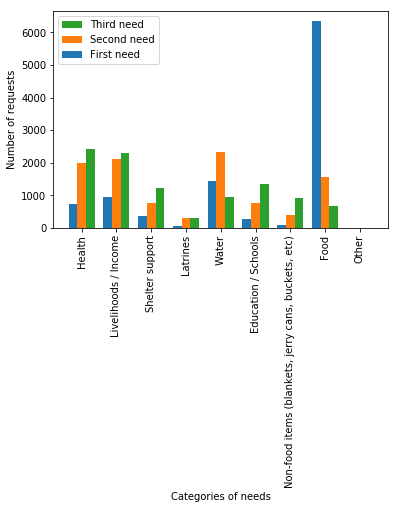

In [594]:
needs = ["Health", "Livelihoods / Income", "Shelter support", "Latrines","Water", "Education / Schools",
                   "Non-food items (blankets, jerry cans, buckets, etc)", "Food", "Other"]
first_need_count = np.zeros(len(needs))
second_need_count = np.zeros(len(needs))
third_need_count = np.zeros(len(needs))
print(data.shape)    
for i in range(len(needs)):
    temp = data.loc[data["What is the first priority need for your household overall?"] == needs[i]]
    first_need_count[i] = temp.shape[0]
    
    temp = data.loc[data["What is the second priority need for your household overall?"] == needs[i]]
    second_need_count[i] = temp.shape[0]
    
    temp = data.loc[data["What is the third priority need for your household overall?"] == needs[i]]
    third_need_count[i] = temp.shape[0]
    
x = np.arange(len(needs)) 
bar_width = 0.25

fig, ax = plt.subplots()
plt.bar(x - bar_width, first_need_count, width = bar_width, label="First need")
plt.bar(x, second_need_count, width = bar_width, label="Second need")
plt.bar(x + bar_width, third_need_count, width = bar_width, label="Third need")
#plt.xticks(x + bar_width / 2, needs, rotation=45)
plt.ylabel('Number of requests')
plt.xlabel('Categories of needs')
ax.set_xticks(x)
ax.set_xticklabels(needs)
plt.setp(plt.xticks()[1], rotation=90)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])
plt.show()


In [528]:
# Mean by Ward
wdata_byward = wdata.groupby('Ward').mean()
#wdata_byward
# Mean by _uuid
wdata_uuid = wdata.groupby('_uuid').mean()
#wdata_uuid
# Mean by LGA
#wdata_LGA = wdata.groupby('LGA').mean()
print(type(wdata))
wdata_LGA = wdata[wdata["State"].isin(["Borno", "Adamawa", "Yobe"])].groupby('LGA').mean()
wdata_LGA

<class 'pandas.core.frame.DataFrame'>


WASH_No_Water_Access  WASH_Below_15lpd  WASH_No_Latrine_Access  \
LGA                                                                          
askirauba               0.822917          0.406250                0.229167   
bade                    0.231481          0.513889                0.092593   
bama                    0.000000          1.048951                0.223776   
bayo                    1.431034          0.129310                0.482759   
biu                     0.353535          0.242424                0.060606   
bursari                 0.463415          0.182927                0.682927   
chibok                  0.793478          0.260870                0.195652   
damaturu                0.331210          0.687898                0.165605   
damboa                  0.289308          0.339623                0.176101   
demsa                   1.038760          0.186047                1.178295   
dikwa                   0.182510          0.250951                0.167300   
fika                    0.744186          0.436047                0.313953   
fufore                  1.185185          0.422222                1.288889   
fune                    0.736111          0.687500                0.347222   
ganye                   1.770992          0.618321                1.114504   
geidam                  0.828897          0.159696                0.076046   
girei                   0.976744          0.441860                0.914729   
gombi                   1.234973          0.508197                1.158470   
gubio                   0.188235          0.282353                0.376471   
gujba                   0.184971          0.450867                0.277457   
gulani                  0.321951          0.482927                0.087805   
guyuk                   1.770992          0.435115                1.496183   
guzamala                0.130909          0.610909                1.469091   
gwoza                   0.333333          0.450000                0.100000   
hawul                   0.588235          0.433155                0.096257   
hong                    0.672000          0.264000                0.688000   
jada                    1.627907          0.348837                1.503876   
jakusko                 0.457516          0.352941                0.784314   
jere                    0.261780          0.486911                0.136126   
kaga                    0.410959          0.287671                0.068493   
...                          ...               ...                     ...   
kukawa                  0.327485          0.578947                0.538012   
kwayakusar              0.816901          0.359155                0.183099   
lamurde                 1.485294          0.573529                1.617647   
machina                 0.000000          0.228070                1.029240   
madagali                0.719424          0.410072                0.561151   
mafa                    0.047904          0.359281                0.311377   
magumeri                0.259067          0.279793                0.404145   
maiduguri               0.500000          0.237342                0.025316   
maiha                   0.742424          0.590909                0.500000   
mayobelwa               1.528455          0.268293                1.154472   
michika                 0.732824          0.572519                0.809160   
mobbar                  0.118919          0.291892                0.237838   
monguno                 0.122699          0.441718                0.515337   
mubinorth               0.791367          0.517986                0.661871   
mubisouth               0.592593          0.644444                0.207407   
nangere                 0.865248          0.234043                0.439716   
ngala                   0.116838          0.206186                0.171821   
nganzai                 0.119403          0.104478                0.517413   
nguru                   0.226601  

## Map

The shape files are downloaded from [here](https://data.humdata.org/dataset/nga-administrative-boundaries
).

In [529]:
import os
print ("the actual path is:", os.getcwd())

shapes = gpd.read_file("nga_admbnda_adm3_osgof_eha_20170719.shp")
#shapes
LGA_shapes = gpd.read_file("nga_adm_osgof_20190417_SHP/nga_admbnda_adm2_osgof_20190417.shp")
LGA_shapes = LGA_shapes[LGA_shapes["ADM1_EN"].isin(["Borno", "Adamawa", "Yobe"])]
LGA_shapes

the actual path is: /Users/luca/Desktop/Hack4Good/team-black-master/notebooks


Shape_Leng  Shape_Area      ADM2_EN ADM2_PCODE     ADM2_REF ADM2ALT1EN  \
2      3.075316    0.326868       Abadam   NG008001       Abadam       None   
68     2.713605    0.206528   Askira/Uba   NG008002   Askira/Uba       None   
82     1.901654    0.069385         Bade   NG036001         Bade       None   
90     3.149546    0.415834         Bama   NG008003         Bama       None   
99     1.435857    0.078176         Bayo   NG008004         Bayo       None   
114    2.564246    0.271335          Biu   NG008005          Biu       None   
131    2.394301    0.317661      Bursari   NG036002      Bursari       None   
139    1.576157    0.125630       Chibok   NG008006       Chibok       None   
142    2.050496    0.194430     Damaturu   NG036003     Damaturu       None   
145    3.952172    0.481961       Damboa   NG008007       Damboa       None   
158    1.923669    0.129068        Demsa   NG002001        Demsa       None   
159    1.994908    0.156913        Dikwa   NG008008        Dikwa       None   
221    2.243538    0.178200         Fika   NG036004         Fika       None   
222    3.747953    0.389155       Fufore   NG002002       Fufore       None   
224    3.281636    0.454205         Fune   NG036005         Fune       None   
231    2.122051    0.171992        Ganye   NG002003        Ganye       None   
240    2.665208    0.319617       Geidam   NG036006       Geidam       None   
243    1.478029    0.098248        Girei   NG002005        Girei       None   
247    1.842475    0.178513        Gombi   NG002004        Gombi       None   
249    2.221293    0.218268        Gubio   NG008009        Gubio       None   
251    2.641218    0.287318        Gujba   NG036007        Gujba       None   
252    2.193495    0.176145       Gulani   NG036008       Gulani       None   
259    1.166444    0.056735        Guyuk   NG002006        Guyuk       None   
260    2.400938    0.209488     Guzamala   NG008010     Guzamala       None   
270    2.185716    0.242719        Gwoza   NG008011        Gwoza       None   
272    1.973643    0.166221        Hawul   NG008012        Hawul       None   
273    2.233111    0.219587         Hong   NG002007         Hong       None   
380    3.047352    0.213871         Jada   NG002008         Jada       None   
382    2.689351    0.293465      Jakusko   NG036009      Jakusko       None   
387    1.889572    0.069979         Jere   NG008013         Jere       None   
..          ...         ...          ...        ...          ...        ...   
457    1.119672    0.061709  Kwaya Kusar   NG008018  Kwaya Kusar       None   
462    1.420854    0.091071      Lamurde   NG002009      Lamurde       None   
471    1.779161    0.106662      Machina   NG036011      Machina       None   
472    1.190357    0.068676     Madagali   NG002010     Madagali       None   
474    2.460498    0.236870         Mafa   NG008019         Mafa       None   
476    3.011609    0.392771     Magumeri   NG008020     Magumeri       None   
478    0.519518    0.011603    Maiduguri   NG008021    Maiduguri       None   
480    1.754502    0.111811        Maiha   NG002011        Maiha       None   
491    2.272926    0.245922        Marte   NG008022        Marte       None   
496    2.728931    0.173412   Mayo-Belwa   NG002012   Mayo-Belwa       None   
499    1.113935    0.066966      Michika   NG002013      Michika       None   
506    2.534845    0.225422       Mobbar   NG008023       Mobbar       None   
508    2.423728    0.157379      Monguno   NG008024      Monguno       None   
511    1.046657    0.062198   Mubi North   NG002014   Mubi North       None   
512    0.974724    0.041478   Mubi South   NG002015   Mubi South       None   
517    1.774226    0.086600      Nangere   NG036012      Nangere       None   
524    1.807494    0.119920        Ngala   NG008025        Ngala       None   
525    2.306222    0.192372      Nganzai   NG008026      Nganzai       None   
528    1.186747    0.068036        Nguru   NG036013    

### Plot average index data by ward

TODO: correct Ward mapping (currently missing values are set to 0) between dataset and shape file.

Added LGA_shape (level 2) which contains the shapes of LGA

In [1]:
LGA1 = sample["LGA"].str.lower().str \
    .replace(r"[ \t \- /.&_']*", "", regex=True) \
    .replace(r"(ha[0-9]+)rc", r"\1", regex=True).unique()

LGA1_sorted = sorted(LGA1)

LGA2 = LGA_shapes["ADM2_EN"].str.lower().str \
    .replace(r"[ \t \- /.&_']*", "", regex=True) \
    .replace(r"(ha[0-9]+)rc", r"\1", regex=True).unique()

LGA2_sorted = sorted(LGA2)

LGA_weight = dict.fromkeys(LGA2_sorted)

#Note: different LGA have different weight based on the HH ward
#define an overall LGA weight defined by the average
for i in range(len(LGA2_sorted)):
    #print(LGA2_sorted[i])
    temp = test.loc[test['LGA'] == LGA2_sorted[i]]
    if not bool(temp.empty):
        #calculate average
        temp["WEIGHT_IND_LGA"].mean()
        LGA_weight[LGA2_sorted[i]] = temp["WEIGHT_IND_LGA"].mean()

#multiply value by LGA weight
#NOTE: there is an extremly high weigth, i.e. 31.477803701751366 -- maiduguri
wdata_LGA_weigthed = wdata_LGA.copy()
for index, row in wdata_LGA.iterrows():
     # access data using column names
     if index in LGA2_sorted: 
        wdata_LGA_weigthed.loc[index] = row*LGA_weight[index]



LGA3 = wdata[wdata["State"].isin(["Borno", "Adamawa", "Yobe"])]["LGA"].str.lower().str \
    .replace(r"[ \t \- /.&_']*", "", regex=True) \
    .replace(r"(ha[0-9]+)rc", r"\1", regex=True).unique()

LGA3_sorted = sorted(LGA3)

#LGA that we have in the map but not in  sample, i.e. 'reach_nga_msna_initial_sample.xlsx'
diffcats = list(set(LGA2_sorted) - set(LGA1_sorted))
#LGA that we have in the map but not in  data
diffcats2 = list(set(LGA2_sorted) - set(LGA3_sorted))
diffcats.sort()
print("LGA of which we have the GPS coordinate information but we do not have data:")
print(diffcats)
#print(diffcats2)

NameError: name 'sample' is not defined

In [531]:
ws1 = sample["ward"].str.lower().str \
    .replace(r"[ \t \- /.&_']*", "", regex=True) \
    .replace(r"(ha[0-9]+)rc", r"\1", regex=True).unique()

ws2 = shapes["ADM3_EN"].str.lower().str \
    .replace(r"[ \t \- /.&_']*", "", regex=True) \
    .replace(r"(ha[0-9]+)rc", r"\1", regex=True).unique()

ws1_lon = sample["lon"]
ws1_lat = sample["lat"]

idx = np.argsort(sample["ward"].str.lower().str \
    .replace(r"[ \t \- /.&_']*", "", regex=True) \
    .replace(r"(ha[0-9]+)rc", r"\1", regex=True))
ws1_lon = np.array(ws1_lon[idx])
ws1_lat = np.array(ws1_lat[idx])

ws1.sort()
ws2.sort()

# get list of wards with LON and LAT information
Ward_GPS_coord = np.array([])
wards = np.array([])
lat = np.array([])
lon = np.array([])
for i,x in enumerate(ws1):
    if (x in ws2 and not(math.isnan(ws1_lon[i])) and not(math.isnan(ws1_lat[i]))):
        wards = np.append(wards, x)
        lat = np.append(lat, ws1_lat[i])
        lon = np.append(lon, ws1_lon[i])
        file = {'name':x, 'idx':i, 'lon': ws1_lon[i], 'lat': ws1_lat[i]}
        Ward_GPS_coord = np.append(Ward_GPS_coord, file)

list(map((lambda x: (x, x in ws2)), ws1))

[('afunori', True),
 ('alagarno', True),
 ('alarge', True),
 ('alkalawa', True),
 ('asheikiri1', False),
 ('asheikiri2', False),
 ('askiraeast', True),
 ('auno', True),
 ('babangida', True),
 ('baga', True),
 ('bajama', True),
 ('bakarigoso', True),
 ('bakta', True),
 ('balbaya', True),
 ('bangshika', True),
 ('bara', True),
 ('bare', True),
 ('bargu', True),
 ('bayamari', True),
 ('bazzamargi', True),
 ('benisheikh', True),
 ('beti', True),
 ('betso', True),
 ('bilagusi', True),
 ('bilaljawa', False),
 ('bilingwi', True),
 ('bille', True),
 ('binyeri', True),
 ('biriri', True),
 ('bobini', True),
 ('bodeno', True),
 ('bodwai', True),
 ('boga', True),
 ('bolewaa', True),
 ('boleyoldepate', True),
 ('bolorii', True),
 ('boloriii', True),
 ('bornokiji', True),
 ('borrong', True),
 ('briyel', True),
 ('buduwa', True),
 ('bulabulin', True),
 ('bularafa', True),
 ('bulatura', True),
 ('bumsa', True),
 ('buniyadi', True),
 ('bwalki', True),
 ('chikila', True),
 ('chilariye', True),
 ('chukir

In [550]:
#print(wdata_byward.columns[:-9])
# max value excluding 'SUBTOTAL_' per sector and 'SUMMARY_SECTORS'
"""
MAX_wdata = wdata_byward.loc[:,wdata_byward.columns[:-9]].max().max()
MAX_wdata_subtotal = wdata_byward.loc[:,wdata_byward.columns[-8:-1]].max().max()
MAX_wdata_summary = wdata_byward.loc[:,wdata_byward.columns[-1:]].max().max()

MAX_wdata_LGA = wdata_LGA.loc[:,wdata_LGA.columns[:-9]].max().max()
MAX_wdata_subtotal_LGA = wdata_LGA.loc[:,wdata_LGA.columns[-8:-1]].max().max()
MAX_wdata_summary_LGA = wdata_LGA.loc[:,wdata_LGA.columns[-1:]].max().max()
"""
#D = wdata_byward.copy()

def map_ward_to_weight(column, D):
    return shapes["ADM3_EN"].str.lower().str \
            .replace(r"[ \t \- /.&_']*", "", regex=True) \
            .replace(r"(ha[0-9]+)rc", r"\1", regex=True) \
            .map(lambda x: D.loc[x, column] if x in D.index else -1)

#Note: now I multiply the category value of the ward by its weight
def map_LGA_to_weight(column, D):
    return LGA_shapes["ADM2_EN"].str.lower().str \
            .replace(r"[ \t \- /.&_']*", "", regex=True) \
            .replace(r"(ha[0-9]+)rc", r"\1", regex=True) \
            .map(lambda x: D.loc[x, column] if x in D.index else -1)
            #.map(lambda x: wdata_LGA.loc[x, column]*LGA_weight[x] if x in wdata_LGA.index else -1)

def get_color_code(values, ref_value):
    color = [] #np.empty(len(values))
    #ref_value = np.max(values)
    for v in values:
        if 0 <= v <= 0.25*ref_value:
            color.append('green')
        elif 0.25*ref_value < v <= 0.5*ref_value:
            color.append('yellow')
        elif 0.5*ref_value < v <= 0.75*ref_value:
            color.append('red')
        elif 0.75*ref_value < v <= ref_value:
            color.append('black')
        elif v == -1: #no information
            color.append('pink')
        else:
            print("WARNING!!!")
            color.append('white')
    return color


def plot_map(column, Ward_or_LGA, add_weight):
    map_shapes = shapes
    if Ward_or_LGA == "Wards":
       
        D = wdata_byward.copy()
        MAX_wdata = D.loc[:,D.columns[:-9]].max().max()
        MAX_wdata_subtotal = D.loc[:,D.columns[-8:-1]].max().max()
        MAX_wdata_summary = D.loc[:,D.columns[-1:]].max().max()
        
        if column.startswith('SUBTOTAL_'):
            ref = MAX_wdata_subtotal
        elif column.startswith('SUMMARY_'):
            ref = MAX_wdata_summary
        else:
            ref = MAX_wdata
            
        map_shapes[column] = map_ward_to_weight(column, D)
    elif Ward_or_LGA == "LGA":
        map_shapes = LGA_shapes
        if add_weight == "True":
            D = wdata_LGA_weigthed.copy()
        else:
            D = wdata_LGA.copy()
            
        MAX_wdata_LGA = D.loc[:,D.columns[:-9]].max().max()
        MAX_wdata_subtotal_LGA = D.loc[:,D.columns[-8:-1]].max().max()
        MAX_wdata_summary_LGA = D.loc[:,D.columns[-1:]].max().max()    
            
        if column.startswith('SUBTOTAL_'):
            ref = MAX_wdata_subtotal_LGA
        elif column.startswith('SUMMARY_'):
            ref = MAX_wdata_summary_LGA
        else:
            ref = MAX_wdata_LGA
        map_shapes[column] = map_LGA_to_weight(column, D)

 
    print("Max reference value: ", ref)
    color = get_color_code(map_shapes[column], ref)
    fig, ax = plt.subplots(1, figsize=(14, 14))
    #shapes.plot(column=column, ax=ax, facecolor='red')
    map_shapes.plot(ax=ax, facecolor=color, edgecolor='black')
    #shapes.apply(lambda x: ax.annotate(s=x.ADM3_EN, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
    ax.set_title(column, fontsize=12)
    
_ = interact(plot_map, column=wdata_byward.columns, Ward_or_LGA=["Wards", "LGA"], add_weight = ["False", "True"])

interactive(children=(Dropdown(description='column', options=('WASH_No_Water_Access', 'WASH_Below_15lpd', 'WAS…

In [486]:
ordering = [('LATITUDE','lat'), ('LONGITUDE', 'lon')]
#interact(f, x=[('one', 10), ('two', 20)]);
def map_ward(column):
    return shapes["ADM3_EN"].str.lower().str \
            .replace(r"[ \t \- /.&_']*", "", regex=True) \
            .replace(r"(ha[0-9]+)rc", r"\1", regex=True) \
            .map(lambda x: [x, wdata_byward.loc[x, column]] if (x in wdata_byward.index) else 0.0)

def plot_by_index(sorting):
    if sorting == 'lat':
        idx = np.argsort(lat) 
    elif sorting == 'lon':
        idx = np.argsort(lon)
    
    for j in wdata_byward.columns[-8:-1]: #len(wdata_byward.columns)
        par = j
        wards_sort = wards[idx]

        WashNoWaterAccess = map_ward(par)
        WashNoWaterAccess = np.array(WashNoWaterAccess[np.asarray(np.nonzero(WashNoWaterAccess))[0]])

        WashNoWaterAccess_sorted = np.zeros(len(wards_sort))
        for i in WashNoWaterAccess:
            if i[0] in wards_sort:
                l, = np.where(wards_sort == i[0])
                WashNoWaterAccess_sorted[l[0]] = i[1]

        ind = np.arange(len(wards_sort))
        width = 0.8      # the width of the bars: can also be len(x) sequence

        plt.figure(figsize=(50,10)) 
        #plt.plot(wards_sort, WashNoWaterAccess_sorted, 'o')
        plt.bar(ind, WashNoWaterAccess_sorted, width)
        plt.xlabel('Ward', fontsize=25)
        plt.tick_params(axis='x', rotation=45)
        plt.xticks(ind, wards_sort)
        plt.ylabel(par, fontsize=25)
        plt.title('Indexing per ward', fontsize=30)
        plt.show()

_ = interact(plot_by_index, sorting=ordering)

print(wdata_byward.columns)


interactive(children=(Dropdown(description='sorting', options=(('LATITUDE', 'lat'), ('LONGITUDE', 'lon')), val…

Index(['WASH_No_Water_Access', 'WASH_Below_15lpd', 'WASH_No_Latrine_Access',
       'WASH_Above_30min', 'WASH_No_Soap', 'SHELTER_Inadequate',
       'SHELTER_Damaged', 'SHELTER_Eviction_Risk', 'SHELTER_No_Basic_Items',
       'SHELTER_Many_Families', 'FOODSEC_FCS', 'FOODSEC_RCSI', 'FOODSEC_SAFE',
       'FOODSEC_Market', 'FOODSEC_Agriculture', 'LIVE_incomedec', 'LIVE_debt',
       'LIVE_Coping', 'LIVE_Cash', 'EDU_Barrier', 'EDU_NoSupplies',
       'HEALTH_Barrier', 'HEALTH_Illness2w', 'HEALTH_Distance2km',
       'HEALTH_Delivery', 'NUTRITION', 'PROTECTION_Explosives',
       'PROTECTION_Incident3m', 'PROTECTION_NoDocs', 'PROTECTION_Movement',
       'PROTECTION_MissingMembers', 'SUBTOTAL_WASH', 'SUBTOTAL_SHELTER',
       'SUBTOTAL_FOODSEC', 'SUBTOTAL_LIVE', 'SUBTOTAL_EDU', 'SUBTOTAL_HEALTH',
       'SUBTOTAL_NUTRITION', 'SUBTOTAL_PROTECTION', 'SUMMARY_SECTORS'],
      dtype='object')


In [286]:
pd.read_pickle("../../team-black/data/weights.pkl")

_uuid  WASH_No_Water_Access  \
1      b6c80fdbb1ca429a9efd6b9e3fa64992                   2.0   
2      5b7de9fd694d48729a7e09f176608203                   0.0   
3      7031b6349a9248d1ad8035977126e508                   0.0   
4      56f7aa22c0ac49a1ae3e65d735d8f78e                   0.0   
5      fceb0bef99204d818cfebeafa14077ca                   0.0   
6      b872a2a111cd4521be5b7767dc670439                   2.0   
7      8f13162335da45a88fdc5899cd9f1a67                   2.0   
8      b14a6e98023f4d85943586cfe3863acb                   2.0   
9      784a85efb0ab4038bfc7bc2f7613053f                   2.0   
10     a3fd553399bc488d93319798e87c8380                   0.0   
12     238185a7ddac448eb386ca0183e57658                   0.0   
13     4089c6ca37354ca7b7b35635fa8c72d0                   0.0   
15     d902a220107644ee9ee71fb8d867b351                   0.0   
17     06935c66437d4fa084f88c0512b59fe6                   2.0   
18     0a4b6f4c8461433a87ce04e9a1f36ddd                   0.0   
19     7e674b0c52ed457e9441e4cb026ff650                   0.0   
20     085fa20e220d400cb09f31bd9fa836ac                   0.0   
21     5573564180ca416694c5309bd33dcaf0                   2.0   
23     5ec2df4c7a5c42aaa11ad31a5c4df7a4                   0.0   
24     704b6be3d1d74ca7a0e754c500e098e8                   0.0   
25     c35ebb906bed40f1875a87aee674cb5d                   0.0   
26     934a58ddb8934759a87e5cec60c6d1a3                   0.0   
28     1f4ce687ac9745aea58ed77b2acde91e                   2.0   
29     36a56d99354c4fb3ba148f6e1e08ee46                   2.0   
30     e106e32b2093470882d6f45c5cf566ee                   0.0   
31     a2bf4fec800c4d5295fc297f4e0fbd29                   2.0   
32     e591a17a9bd045b3bc1f514e53a38949                   0.0   
33     bda935b33d364545b84afcd80eb0f630                   0.0   
34     935a39ac080b4821b6c5a243d2489604                   0.0   
37     7726a25d5e8c4839b5f880d59f5ba128                   0.0   
...                                 ...                   ...   
10576  2cbc48ff2d6a42b9a46c68d2efbf2c79                   0.0   
10577  cf417744c2244c63ba65ed0c719ac870                   0.0   
10578  701adbe204aa4070a2bc1297f52bae51                   2.0   
10579  166f28fa4cfe49aea133c46b2a16e4e7                   0.0   
10580  580c4af2d2b943c2b3012717bb676e7f                   2.0   
10581  1f60db606fde4e34b976f56cf85078bc                   2.0   
10582  814ee108062e4b07a45f24c5f4ffaa70                   2.0   
10583  b359506e06c24f6e8495e9cd09fdc459                   0.0   
10584  d57fc9b4a72d4d9e9b07a3688801d2ab                   0.0   
10585  21c2e167d8cc4ad785097789301a2cef                   0.0   
10586  13e2c4ebce3f4b1581a6d473b15a57d2                   2.0   
10587  5f591a1a72ce4fa6809c0832659575e2                   0.0   
10588  5f56af4eacff4bfaaf478273f3568ad7                   0.0   
10589  245c7d313efa4ba1a14a24b218ebaa6f                   0.0   
10590  b944418f6ed545b6b1d0e07ddabfc0d4                   0.0   
10591  39c712dcbc4e4c418e1b1e34f0839d22                   0.0   
10592  263126aeba9646ce90eebfcb25c01fb0                   0.0   
10593  1cf97f6b1e6b4de987afa432a8cf90c1                   0.0   
10594  765bd93a2f084c1285af75a6346e6e91                   0.0   
10595  084ba992d52b4601a415cf6cc71d28cb                   0.0   
10596  b373431372034044afa53cc88e908e8f                   2.0   
10597  1a46241cf1f046de8150d84016d83b19                   0.0   
10598  981caba2563242c6824da80544ef98a7                   0.0   
10599  476d3f31e249493a90cc961864da174e                   2.0   
10600  08f24511cef74fbc9e296995475a49a6                   0.0   
10601  178f660f06394887a09b34761f7a00aa                   0.0   
10602  008f16d2c5124698949b3e22b945bcd5                   0.0   
10603  d4b2f2d696474008aa3d84a03fea5ef8                   0.0   
10604  19def9530fce425d8f780e4c97b85d0f                   2.0   
10605  cc56a88ab8134f77befd062ee04a2ee7                   0.0   

   